# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
### *UNCOMMENT BELOW CODE TO RUN THIS FILE IN COLAB*
### *  COMMENT BELOW CODE TO RUN THIS FILE IN LOCAL MACHINE*
### setting up missing pythong modules in Colab
!pip install tqdm -q

#remove older files, to make rerunnable
!rm helper.py
!rm problem_unittests.py

### downloading helper files
!wget https://raw.githubusercontent.com/udacity/machine-learning/master/projects/image-classification/helper.py -q
!wget https://raw.githubusercontent.com/udacity/machine-learning/master/projects/image-classification/problem_unittests.py -q
!ls
print('Req files setup finished')

checkpoint				  preprocess_batch_2.p
cifar-10-batches-py			  preprocess_batch_3.p
cifar-10-python.tar.gz			  preprocess_batch_4.p
datalab					  preprocess_batch_5.p
helper.py				  preprocess_training.p
image_classification.data-00000-of-00001  preprocess_validation.p
image_classification.index		  problem_unittests.py
image_classification.meta		  __pycache__
preprocess_batch_1.p
Req files setup finished


In [2]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile
from time import time
import datetime

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


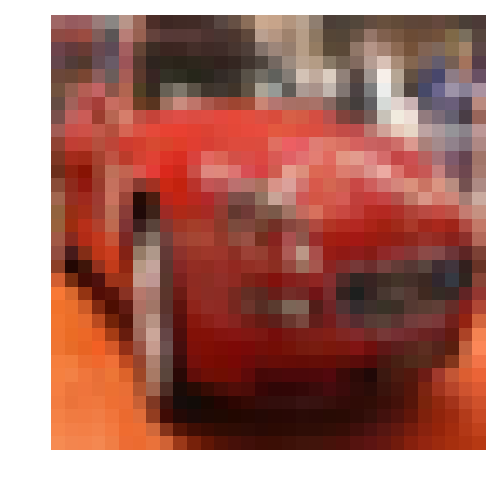

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [4]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return (x - np.amin(x))/(np.amax(x) - np.amin(x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

**Hint:**

Look into LabelBinarizer in the preprocessing module of sklearn.

In [5]:
from sklearn.preprocessing import LabelBinarizer
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(0,10,1))
    return label_binarizer.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [0]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [8]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
    image_height = image_shape[0]
    image_width = image_shape[1]
    color_channels = image_shape[2]
    return tf.placeholder(tf.float32, [None, image_height, image_width, color_channels], name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, [None, n_classes], name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

** Hint: **

When unpacking values as an argument in Python, look into the [unpacking](https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists) operator. 

In [9]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    # Convolution filter
    filter_size_height = conv_ksize[0]
    filter_size_width = conv_ksize[1]
    
    # Image Properties
    # image_width = 10
    # image_height = 10
    color_channels = x_tensor.get_shape().as_list()[3]

    # Weight and bias
    weight = tf.Variable(tf.truncated_normal([filter_size_height, filter_size_width, color_channels, conv_num_outputs]))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # Apply Convolution
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, conv_strides[0], conv_strides[1], 1], padding='SAME')
    
    # Add bias
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    
    # Apply activation function
    conv_layer = tf.nn.relu(conv_layer)
    
    # Apply Max Pooling
    conv_layer = tf.nn.max_pool(
        conv_layer,
        ksize=[1, pool_ksize[0], pool_ksize[1], 1],
        strides=[1, pool_strides[0], pool_strides[1], 1],
        padding='SAME')
    
    return conv_layer 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [10]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
    return tf.contrib.layers.flatten(x_tensor)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [11]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    width = x_tensor.get_shape().as_list()[1]
    
    # Weight and bias
    weights = tf.Variable(tf.truncated_normal([width, num_outputs]))
    biases = tf.Variable(tf.zeros(num_outputs))
    
    # Fully connected layer
    fc1 = tf.add(tf.matmul(x_tensor, weights), biases)
    fc1 = tf.nn.relu(fc1)
    return fc1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [12]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    width = x_tensor.get_shape().as_list()[1]
    
    # Weight and bias
    weights = tf.Variable(tf.truncated_normal([width, num_outputs]))
    biases = tf.Variable(tf.zeros(num_outputs))
    
    # Output layer
    out = tf.add(tf.matmul(x_tensor, weights), biases)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [13]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    conv = conv2d_maxpool(x, 64, [3,3], [1,1], [2,2], [2,2])
    conv = conv2d_maxpool(conv, 128, [3,3], [1,1], [2,2], [2,2])
    conv = conv2d_maxpool(conv, 256, [3,3], [1,1], [2,2], [2,2])

    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    f = flatten(conv)
    

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
#     fc = fully_conn(f, 128)
    fc = fully_conn(f, 256)
    fc = tf.nn.dropout(fc, keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    logits = output(fc, 10)
    
    # TODO: return output
    return logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [14]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})
    pass


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [0]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function
    loss = session.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.0})
    validation_accuracy = session.run(accuracy, feed_dict={x: valid_features, y: valid_labels, keep_prob: 1.0})
    print('Loss: {}; Validation Accuracy: {}'.format(loss, validation_accuracy))
    global min_accuracy
    global max_accuracy
    if min_accuracy > validation_accuracy:
      min_accuracy = validation_accuracy
    if max_accuracy < validation_accuracy:
      max_accuracy = validation_accuracy
    pass

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [0]:
# TODO: Tune Parameters
epochs = 200
batch_size = 128
keep_probability = 1.

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [17]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
max_accuracy = 0.0
min_accuracy = 99.99
start = time()
print('Start time: {}'.format(datetime.datetime.now()))
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        local_start = time()
#         print('Local Start time: {}'.format(datetime.datetime.now()))
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)
        local_end = time()
        print('Duration: {}'.format(local_end - local_start))
print('################################################')
print('single batch training accuracy-> #Min:{} #Max:{}'.format(min_accuracy,max_accuracy))
end = time()
print('End time: {}'.format(datetime.datetime.now()))
print('Total time: {}'.format(end - start))

Checking the Training on a Single Batch...
Start time: 2018-06-15 02:24:04.726975
Epoch  1, CIFAR-10 Batch 1:  Loss: 75847.28125; Validation Accuracy: 0.20999999344348907
Duration: 4.855976819992065
Epoch  2, CIFAR-10 Batch 1:  Loss: 49718.35546875; Validation Accuracy: 0.24300000071525574
Duration: 2.2110047340393066
Epoch  3, CIFAR-10 Batch 1:  Loss: 36734.23046875; Validation Accuracy: 0.2775999903678894
Duration: 1.9482696056365967
Epoch  4, CIFAR-10 Batch 1:  Loss: 29417.72265625; Validation Accuracy: 0.2955999970436096
Duration: 1.9506313800811768
Epoch  5, CIFAR-10 Batch 1:  Loss: 24826.640625; Validation Accuracy: 0.3043999969959259
Duration: 1.948112964630127
Epoch  6, CIFAR-10 Batch 1:  Loss: 21595.84765625; Validation Accuracy: 0.32179999351501465
Duration: 1.952120304107666
Epoch  7, CIFAR-10 Batch 1:  Loss: 17849.82421875; Validation Accuracy: 0.3203999996185303
Duration: 1.9403200149536133
Epoch  8, CIFAR-10 Batch 1:  Loss: 15456.751953125; Validation Accuracy: 0.34619998

Epoch 29, CIFAR-10 Batch 1:  Loss: 1725.6009521484375; Validation Accuracy: 0.42239999771118164
Duration: 1.953779935836792
Epoch 30, CIFAR-10 Batch 1:  Loss: 1701.788330078125; Validation Accuracy: 0.4327999949455261
Duration: 1.9495253562927246
Epoch 31, CIFAR-10 Batch 1:  Loss: 1913.657958984375; Validation Accuracy: 0.4221999943256378
Duration: 1.9468884468078613
Epoch 32, CIFAR-10 Batch 1:  Loss: 2326.43505859375; Validation Accuracy: 0.41679999232292175
Duration: 1.945990800857544
Epoch 33, CIFAR-10 Batch 1:  Loss: 2954.31005859375; Validation Accuracy: 0.41780000925064087
Duration: 1.9510650634765625
Epoch 34, CIFAR-10 Batch 1:  Loss: 3064.392578125; Validation Accuracy: 0.42320001125335693
Duration: 1.9544458389282227
Epoch 35, CIFAR-10 Batch 1:  Loss: 2682.28466796875; Validation Accuracy: 0.42579999566078186
Duration: 1.9430201053619385
Epoch 36, CIFAR-10 Batch 1:  Loss: 2283.89794921875; Validation Accuracy: 0.4196000099182129
Duration: 1.9552228450775146
Epoch 37, CIFAR-10 

Epoch 57, CIFAR-10 Batch 1:  Loss: 275.442138671875; Validation Accuracy: 0.4275999963283539
Duration: 1.940748691558838
Epoch 58, CIFAR-10 Batch 1:  Loss: 491.8797912597656; Validation Accuracy: 0.4171999990940094
Duration: 1.9360554218292236
Epoch 59, CIFAR-10 Batch 1:  Loss: 404.3887939453125; Validation Accuracy: 0.4129999876022339
Duration: 1.9508154392242432
Epoch 60, CIFAR-10 Batch 1:  Loss: 402.2530212402344; Validation Accuracy: 0.4198000133037567
Duration: 1.943310022354126
Epoch 61, CIFAR-10 Batch 1:  Loss: 279.8714294433594; Validation Accuracy: 0.4406000077724457
Duration: 1.932758092880249
Epoch 62, CIFAR-10 Batch 1:  Loss: 193.90676879882812; Validation Accuracy: 0.45239999890327454
Duration: 1.9499726295471191
Epoch 63, CIFAR-10 Batch 1:  Loss: 194.66844177246094; Validation Accuracy: 0.451200008392334
Duration: 1.9422225952148438
Epoch 64, CIFAR-10 Batch 1:  Loss: 119.9334487915039; Validation Accuracy: 0.45559999346733093
Duration: 1.9501495361328125
Epoch 65, CIFAR-1

Loss: 0.0; Validation Accuracy: 0.47940000891685486
Duration: 1.9460718631744385
Epoch 86, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4787999987602234
Duration: 1.9420928955078125
Epoch 87, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4814000129699707
Duration: 1.9265758991241455
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.48100000619888306
Duration: 1.9393789768218994
Epoch 89, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.47279998660087585
Duration: 1.9334428310394287
Epoch 90, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.47279998660087585
Duration: 1.940493106842041
Epoch 91, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.47279998660087585
Duration: 1.9283978939056396
Epoch 92, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4715999960899353
Duration: 1.9499232769012451
Epoch 93, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.47999998927116394
Duration: 1.942645788192749
Epoch 94, CIFAR-10 Batch 1:  Loss: 0.0; Vali

Epoch 115, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4805999994277954
Duration: 1.933924674987793
Epoch 116, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.48420000076293945
Duration: 1.9382290840148926
Epoch 117, CIFAR-10 Batch 1:  Loss: 57.422264099121094; Validation Accuracy: 0.4729999899864197
Duration: 1.946993350982666
Epoch 118, CIFAR-10 Batch 1:  Loss: 22.790576934814453; Validation Accuracy: 0.49380001425743103
Duration: 1.9385185241699219
Epoch 119, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4968000054359436
Duration: 1.9390308856964111
Epoch 120, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.49160000681877136
Duration: 1.9455537796020508
Epoch 121, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.47679999470710754
Duration: 1.936048984527588
Epoch 122, CIFAR-10 Batch 1:  Loss: 228.42626953125; Validation Accuracy: 0.4681999981403351
Duration: 1.9328866004943848
Epoch 123, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4745999872684

Loss: 0.0; Validation Accuracy: 0.49480000138282776
Duration: 1.9539413452148438
Epoch 145, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4779999852180481
Duration: 1.9410812854766846
Epoch 146, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4875999987125397
Duration: 1.9344768524169922
Epoch 147, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5012000203132629
Duration: 1.9534049034118652
Epoch 148, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5019999742507935
Duration: 1.935798168182373
Epoch 149, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5040000081062317
Duration: 1.9367461204528809
Epoch 150, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.49300000071525574
Duration: 1.940561294555664
Epoch 151, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.48179998993873596
Duration: 1.9385485649108887
Epoch 152, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4918000102043152
Duration: 1.9300849437713623
Epoch 153, CIFAR-10 Batch 1:  Loss: 0.0

Epoch 174, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5070000290870667
Duration: 1.9408133029937744
Epoch 175, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5022000074386597
Duration: 1.9359729290008545
Epoch 176, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4860000014305115
Duration: 1.9446308612823486
Epoch 177, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4862000048160553
Duration: 1.9266722202301025
Epoch 178, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5073999762535095
Duration: 1.9396851062774658
Epoch 179, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.4875999987125397
Duration: 1.9373571872711182
Epoch 180, CIFAR-10 Batch 1:  Loss: 84.363037109375; Validation Accuracy: 0.49939998984336853
Duration: 1.9350285530090332
Epoch 181, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5076000094413757
Duration: 1.9314351081848145
Epoch 182, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.510200023651123
Duration: 1.940932750701904

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
save_model_path = './image_classification'

print('Training...')
max_accuracy = 0.0
min_accuracy = 99.99
start = time()
print('Start time: {}'.format(datetime.datetime.now()))
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)
    
print('################################################')
print('Full training accuracy-> #Min:{} #Max:{}'.format(min_accuracy,max_accuracy))
end = time()
print('End time: {}'.format(datetime.datetime.now()))
print('Total time: {}'.format(end - start))

Training...
Start time: 2018-06-15 02:30:37.216996
Epoch  1, CIFAR-10 Batch 1:  Loss: 98646.203125; Validation Accuracy: 0.2354000061750412
Epoch  1, CIFAR-10 Batch 2:  Loss: 47559.14453125; Validation Accuracy: 0.2587999999523163
Epoch  1, CIFAR-10 Batch 3:  Loss: 35300.11328125; Validation Accuracy: 0.30379998683929443
Epoch  1, CIFAR-10 Batch 4:  Loss: 35068.94140625; Validation Accuracy: 0.313400000333786
Epoch  1, CIFAR-10 Batch 5:  Loss: 28379.837890625; Validation Accuracy: 0.33239999413490295
Epoch  2, CIFAR-10 Batch 1:  Loss: 40766.00390625; Validation Accuracy: 0.34700000286102295
Epoch  2, CIFAR-10 Batch 2:  Loss: 20165.32421875; Validation Accuracy: 0.3400000035762787
Epoch  2, CIFAR-10 Batch 3:  Loss: 20361.33203125; Validation Accuracy: 0.3481999933719635
Epoch  2, CIFAR-10 Batch 4:  Loss: 14919.310546875; Validation Accuracy: 0.35920000076293945
Epoch  2, CIFAR-10 Batch 5:  Loss: 14058.935546875; Validation Accuracy: 0.3619999885559082
Epoch  3, CIFAR-10 Batch 1:  Loss: 

Epoch  7, CIFAR-10 Batch 3:  Loss: 4723.62255859375; Validation Accuracy: 0.44359999895095825
Epoch  7, CIFAR-10 Batch 4:  Loss: 3854.681640625; Validation Accuracy: 0.444599986076355
Epoch  7, CIFAR-10 Batch 5:  Loss: 4030.60400390625; Validation Accuracy: 0.4339999854564667
Epoch  8, CIFAR-10 Batch 1:  Loss: 4441.57568359375; Validation Accuracy: 0.454800009727478
Epoch  8, CIFAR-10 Batch 2:  Loss: 4706.95556640625; Validation Accuracy: 0.44359999895095825
Epoch  8, CIFAR-10 Batch 3:  Loss: 3494.91748046875; Validation Accuracy: 0.44760000705718994
Epoch  8, CIFAR-10 Batch 4:  Loss: 3171.682373046875; Validation Accuracy: 0.45239999890327454
Epoch  8, CIFAR-10 Batch 5:  Loss: 3777.42138671875; Validation Accuracy: 0.44999998807907104
Epoch  9, CIFAR-10 Batch 1:  Loss: 3352.73095703125; Validation Accuracy: 0.4586000144481659
Epoch  9, CIFAR-10 Batch 2:  Loss: 4147.28759765625; Validation Accuracy: 0.4546000063419342
Epoch  9, CIFAR-10 Batch 3:  Loss: 2881.661376953125; Validation Acc

Loss: 1423.0775146484375; Validation Accuracy: 0.4772000014781952
Epoch 14, CIFAR-10 Batch 1:  Loss: 1368.381103515625; Validation Accuracy: 0.48579999804496765
Epoch 14, CIFAR-10 Batch 2:  Loss: 1694.7711181640625; Validation Accuracy: 0.4691999852657318
Epoch 14, CIFAR-10 Batch 3:  Loss: 1084.1617431640625; Validation Accuracy: 0.4814000129699707
Epoch 14, CIFAR-10 Batch 4:  Loss: 1020.3250122070312; Validation Accuracy: 0.4830000102519989
Epoch 14, CIFAR-10 Batch 5:  Loss: 1040.2183837890625; Validation Accuracy: 0.4781999886035919
Epoch 15, CIFAR-10 Batch 1:  Loss: 882.2069091796875; Validation Accuracy: 0.48339998722076416
Epoch 15, CIFAR-10 Batch 2:  Loss: 1117.718505859375; Validation Accuracy: 0.47679999470710754
Epoch 15, CIFAR-10 Batch 3:  Loss: 667.5706787109375; Validation Accuracy: 0.4772000014781952
Epoch 15, CIFAR-10 Batch 4:  Loss: 702.2657470703125; Validation Accuracy: 0.48739999532699585
Epoch 15, CIFAR-10 Batch 5:  Loss: 748.2332153320312; Validation Accuracy: 0.484

Loss: 221.6357421875; Validation Accuracy: 0.49799999594688416
Epoch 20, CIFAR-10 Batch 3:  Loss: 349.11468505859375; Validation Accuracy: 0.49939998984336853
Epoch 20, CIFAR-10 Batch 4:  Loss: 244.57553100585938; Validation Accuracy: 0.5103999972343445
Epoch 20, CIFAR-10 Batch 5:  Loss: 133.81283569335938; Validation Accuracy: 0.5009999871253967
Epoch 21, CIFAR-10 Batch 1:  Loss: 541.2529907226562; Validation Accuracy: 0.5019999742507935
Epoch 21, CIFAR-10 Batch 2:  Loss: 63.724342346191406; Validation Accuracy: 0.5099999904632568
Epoch 21, CIFAR-10 Batch 3:  Loss: 248.8902130126953; Validation Accuracy: 0.5112000107765198
Epoch 21, CIFAR-10 Batch 4:  Loss: 175.8532257080078; Validation Accuracy: 0.5085999965667725
Epoch 21, CIFAR-10 Batch 5:  Loss: 41.787330627441406; Validation Accuracy: 0.5123999714851379
Epoch 22, CIFAR-10 Batch 1:  Loss: 438.269775390625; Validation Accuracy: 0.503000020980835
Epoch 22, CIFAR-10 Batch 2:  Loss: 169.5890655517578; Validation Accuracy: 0.5037999749

Loss: 97.13058471679688; Validation Accuracy: 0.5175999999046326
Epoch 26, CIFAR-10 Batch 5:  Loss: 23.552793502807617; Validation Accuracy: 0.5138000249862671
Epoch 27, CIFAR-10 Batch 1:  Loss: 163.32901000976562; Validation Accuracy: 0.520799994468689
Epoch 27, CIFAR-10 Batch 2:  Loss: 54.402549743652344; Validation Accuracy: 0.5090000033378601
Epoch 27, CIFAR-10 Batch 3:  Loss: 61.82054901123047; Validation Accuracy: 0.5117999911308289
Epoch 27, CIFAR-10 Batch 4:  Loss: 87.06793212890625; Validation Accuracy: 0.5139999985694885
Epoch 27, CIFAR-10 Batch 5:  Loss: 46.76268768310547; Validation Accuracy: 0.5094000101089478
Epoch 28, CIFAR-10 Batch 1:  Loss: 100.30690002441406; Validation Accuracy: 0.522599995136261
Epoch 28, CIFAR-10 Batch 2:  Loss: 78.24484252929688; Validation Accuracy: 0.5073999762535095
Epoch 28, CIFAR-10 Batch 3:  Loss: 19.626850128173828; Validation Accuracy: 0.5171999931335449
Epoch 28, CIFAR-10 Batch 4:  Loss: 57.175140380859375; Validation Accuracy: 0.52079999

Loss: 56.88176345825195; Validation Accuracy: 0.5134000182151794
Epoch 33, CIFAR-10 Batch 2:  Loss: 9.991790771484375; Validation Accuracy: 0.5175999999046326
Epoch 33, CIFAR-10 Batch 3:  Loss: 12.886630058288574; Validation Accuracy: 0.5131999850273132
Epoch 33, CIFAR-10 Batch 4:  Loss: 7.7190704345703125; Validation Accuracy: 0.5188000202178955
Epoch 33, CIFAR-10 Batch 5:  Loss: 50.54195785522461; Validation Accuracy: 0.5185999870300293
Epoch 34, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5266000032424927
Epoch 34, CIFAR-10 Batch 2:  Loss: 23.832815170288086; Validation Accuracy: 0.5098000168800354
Epoch 34, CIFAR-10 Batch 3:  Loss: 20.564769744873047; Validation Accuracy: 0.5217999815940857
Epoch 34, CIFAR-10 Batch 4:  Loss: 0.5147033929824829; Validation Accuracy: 0.5194000005722046
Epoch 34, CIFAR-10 Batch 5:  Loss: 18.847034454345703; Validation Accuracy: 0.5145999789237976
Epoch 35, CIFAR-10 Batch 1:  Loss: 5.0154571533203125; Validation Accuracy: 0.5302000045776367
Ep

Epoch 39, CIFAR-10 Batch 4:  Loss: 8.023765563964844; Validation Accuracy: 0.5333999991416931
Epoch 39, CIFAR-10 Batch 5:  Loss: 6.502898216247559; Validation Accuracy: 0.5425999760627747
Epoch 40, CIFAR-10 Batch 1:  Loss: 1.413006067276001; Validation Accuracy: 0.5432000160217285
Epoch 40, CIFAR-10 Batch 2:  Loss: 21.223670959472656; Validation Accuracy: 0.5188000202178955
Epoch 40, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5342000126838684
Epoch 40, CIFAR-10 Batch 4:  Loss: 20.3968448638916; Validation Accuracy: 0.5324000120162964
Epoch 40, CIFAR-10 Batch 5:  Loss: 3.060577392578125; Validation Accuracy: 0.534600019454956
Epoch 41, CIFAR-10 Batch 1:  Loss: 26.590099334716797; Validation Accuracy: 0.5325999855995178
Epoch 41, CIFAR-10 Batch 2:  Loss: 1.861688256263733; Validation Accuracy: 0.5099999904632568
Epoch 41, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5347999930381775
Epoch 41, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.525600016117096
Epoch 41,

Epoch 46, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5311999917030334
Epoch 46, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5382000207901001
Epoch 46, CIFAR-10 Batch 4:  Loss: 28.216476440429688; Validation Accuracy: 0.506600022315979
Epoch 46, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5447999835014343
Epoch 47, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5595999956130981
Epoch 47, CIFAR-10 Batch 2:  Loss: 8.418383598327637; Validation Accuracy: 0.526199996471405
Epoch 47, CIFAR-10 Batch 3:  Loss: 7.716233730316162; Validation Accuracy: 0.5422000288963318
Epoch 47, CIFAR-10 Batch 4:  Loss: 1.4666591882705688; Validation Accuracy: 0.5062000155448914
Epoch 47, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5493999719619751
Epoch 48, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5511999726295471
Epoch 48, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5392000079154968
Epoch 48, CIFAR-10 Batch 3:  Loss: 7.776644706726074; Validation

Loss: 3.1320464611053467; Validation Accuracy: 0.5493999719619751
Epoch 53, CIFAR-10 Batch 1:  Loss: 1.915380835533142; Validation Accuracy: 0.5573999881744385
Epoch 53, CIFAR-10 Batch 2:  Loss: 8.319522857666016; Validation Accuracy: 0.545199990272522
Epoch 53, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5523999929428101
Epoch 53, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5465999841690063
Epoch 53, CIFAR-10 Batch 5:  Loss: 0.7620636224746704; Validation Accuracy: 0.5565999746322632
Epoch 54, CIFAR-10 Batch 1:  Loss: 0.9633544683456421; Validation Accuracy: 0.5564000010490417
Epoch 54, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5460000038146973
Epoch 54, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5432000160217285
Epoch 54, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5436000227928162
Epoch 54, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5475999712944031
Epoch 55, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.55720001459121

Epoch 59, CIFAR-10 Batch 4:  Loss: 8.551803148293402e-06; Validation Accuracy: 0.5343999862670898
Epoch 59, CIFAR-10 Batch 5:  Loss: 10.149380683898926; Validation Accuracy: 0.5631999969482422
Epoch 60, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5595999956130981
Epoch 60, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5564000010490417
Epoch 60, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5523999929428101
Epoch 60, CIFAR-10 Batch 4:  Loss: 1.2842270135879517; Validation Accuracy: 0.5573999881744385
Epoch 60, CIFAR-10 Batch 5:  Loss: 9.463129043579102; Validation Accuracy: 0.5622000098228455
Epoch 61, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5595999956130981
Epoch 61, CIFAR-10 Batch 2:  Loss: 0.2975419759750366; Validation Accuracy: 0.5559999942779541
Epoch 61, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5529999732971191
Epoch 61, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5573999881744385
Epoch 61, CIFAR-10 Batch 5:  Loss: 0.0; Val

Loss: 0.0; Validation Accuracy: 0.5662000179290771
Epoch 66, CIFAR-10 Batch 3:  Loss: 0.3869872987270355; Validation Accuracy: 0.5669999718666077
Epoch 66, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.567799985408783
Epoch 66, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5654000043869019
Epoch 67, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5609999895095825
Epoch 67, CIFAR-10 Batch 2:  Loss: 8.275647163391113; Validation Accuracy: 0.5618000030517578
Epoch 67, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5649999976158142
Epoch 67, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5622000098228455
Epoch 67, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5669999718666077
Epoch 68, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5568000078201294
Epoch 68, CIFAR-10 Batch 2:  Loss: 2.591479539871216; Validation Accuracy: 0.5672000050544739
Epoch 68, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5630000233650208
Epoch 68, CIFAR-10 Batch 4:

Loss: 0.0; Validation Accuracy: 0.5636000037193298
Epoch 73, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5640000104904175
Epoch 73, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5756000280380249
Epoch 73, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5708000063896179
Epoch 73, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5622000098228455
Epoch 74, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5662000179290771
Epoch 74, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5694000124931335
Epoch 74, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5690000057220459
Epoch 74, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5690000057220459
Epoch 74, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5694000124931335
Epoch 75, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5802000164985657
Epoch 75, CIFAR-10 Batch 2:  Loss: 0.2386932373046875; Validation Accuracy: 0.5640000104904175
Epoch 75, CIFAR-10 Batch 3:  Loss: 0.0; Validation Acc

Epoch 80, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5720000267028809
Epoch 80, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5708000063896179
Epoch 80, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5756000280380249
Epoch 80, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5666000247001648
Epoch 80, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5727999806404114
Epoch 81, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5777999758720398
Epoch 81, CIFAR-10 Batch 2:  Loss: 2.4735805936870747e-07; Validation Accuracy: 0.5756000280380249
Epoch 81, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5658000111579895
Epoch 81, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5690000057220459
Epoch 81, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5631999969482422
Epoch 82, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5648000240325928
Epoch 82, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5723999738693237
Epoch 82, CIFAR-10 Ba

Loss: 0.0; Validation Accuracy: 0.5825999975204468
Epoch 87, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5741999745368958
Epoch 87, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5853999853134155
Epoch 87, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5777999758720398
Epoch 87, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5667999982833862
Epoch 87, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.569599986076355
Epoch 88, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5669999718666077
Epoch 88, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5824000239372253
Epoch 88, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5774000287055969
Epoch 88, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5795999765396118
Epoch 88, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5756000280380249
Epoch 89, CIFAR-10 Batch 1:  Loss: 4.031939506530762; Validation Accuracy: 0.5681999921798706
Epoch 89, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accur

Epoch 93, CIFAR-10 Batch 5:  Loss: 1.4901156752955558e-08; Validation Accuracy: 0.578000009059906
Epoch 94, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5885999798774719
Epoch 94, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5723999738693237
Epoch 94, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5831999778747559
Epoch 94, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5834000110626221
Epoch 94, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5767999887466431
Epoch 95, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5717999935150146
Epoch 95, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5821999907493591
Epoch 95, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5767999887466431
Epoch 95, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5838000178337097
Epoch 95, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5857999920845032
Epoch 96, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5662000179290771
Epoch 96, CIFAR-10 Bat

Loss: 0.0; Validation Accuracy: 0.5799999833106995
Epoch 100, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5910000205039978
Epoch 101, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5861999988555908
Epoch 101, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5893999934196472
Epoch 101, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.590399980545044
Epoch 101, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5879999995231628
Epoch 101, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.59579998254776
Epoch 102, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5774000287055969
Epoch 102, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5863999724388123
Epoch 102, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5830000042915344
Epoch 102, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.579200029373169
Epoch 102, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5774000287055969
Epoch 103, CIFAR-10 Batch 1:  Loss: 0.0010145400883629918; Val

Loss: 0.0; Validation Accuracy: 0.5934000015258789
Epoch 107, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5924000144004822
Epoch 107, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5853999853134155
Epoch 108, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5884000062942505
Epoch 108, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5943999886512756
Epoch 108, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.600600004196167
Epoch 108, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5884000062942505
Epoch 108, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5929999947547913
Epoch 109, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5758000016212463
Epoch 109, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5952000021934509
Epoch 109, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5978000164031982
Epoch 109, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5881999731063843
Epoch 109, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accurac

Epoch 114, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5917999744415283
Epoch 114, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5979999899864197
Epoch 114, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5928000211715698
Epoch 115, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.593999981880188
Epoch 115, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5825999975204468
Epoch 115, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.597000002861023
Epoch 115, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6028000116348267
Epoch 115, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5889999866485596
Epoch 116, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5929999947547913
Epoch 116, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5989999771118164
Epoch 116, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5914000272750854
Epoch 116, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5920000076293945
Epoch 116, CIFAR-10 Batch 5:  

Loss: 0.0; Validation Accuracy: 0.5978000164031982
Epoch 121, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5914000272750854
Epoch 121, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5875999927520752
Epoch 121, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.58160001039505
Epoch 122, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5907999873161316
Epoch 122, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5985999703407288
Epoch 122, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.599399983882904
Epoch 122, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5950000286102295
Epoch 122, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.5899999737739563
Epoch 123, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5789999961853027
Epoch 123, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.593999981880188
Epoch 123, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5943999886512756
Epoch 123, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 

Epoch 128, CIFAR-10 Batch 2:  Loss: 2.9802320611338473e-09; Validation Accuracy: 0.6014000177383423
Epoch 128, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5978000164031982
Epoch 128, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5965999960899353
Epoch 128, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6037999987602234
Epoch 129, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5938000082969666
Epoch 129, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.593999981880188
Epoch 129, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.590399980545044
Epoch 129, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6019999980926514
Epoch 129, CIFAR-10 Batch 5:  Loss: 3.1946074962615967; Validation Accuracy: 0.592199981212616
Epoch 130, CIFAR-10 Batch 1:  Loss: 6.580624904017895e-05; Validation Accuracy: 0.6000000238418579
Epoch 130, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.593999981880188
Epoch 130, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy:

Epoch 135, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5879999995231628
Epoch 135, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6074000000953674
Epoch 135, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.598800003528595
Epoch 135, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6047999858856201
Epoch 135, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6096000075340271
Epoch 136, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.59579998254776
Epoch 136, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6003999710083008
Epoch 136, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6000000238418579
Epoch 136, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6075999736785889
Epoch 136, CIFAR-10 Batch 5:  Loss: 0.00022832772810943425; Validation Accuracy: 0.6018000245094299
Epoch 137, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5992000102996826
Epoch 137, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.604200005531311
Epoch 137, CI

Loss: 0.0; Validation Accuracy: 0.5938000082969666
Epoch 142, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.599399983882904
Epoch 142, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6039999723434448
Epoch 142, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6057999730110168
Epoch 142, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6087999939918518
Epoch 142, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6169999837875366
Epoch 143, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.600600004196167
Epoch 143, CIFAR-10 Batch 2:  Loss: 2.1781554222106934; Validation Accuracy: 0.6046000123023987
Epoch 143, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.5956000089645386
Epoch 143, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6001999974250793
Epoch 143, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6079999804496765
Epoch 144, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.593999981880188
Epoch 144, CIFAR-10 Batch 2:  Loss: 0.0; Valid

Epoch 148, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6119999885559082
Epoch 149, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.5996000170707703
Epoch 149, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5983999967575073
Epoch 149, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6025999784469604
Epoch 149, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6105999946594238
Epoch 149, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6010000109672546
Epoch 150, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.607200026512146
Epoch 150, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5920000076293945
Epoch 150, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.614799976348877
Epoch 150, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5925999879837036
Epoch 150, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6122000217437744
Epoch 151, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6078000068664551
Epoch 151, CIFAR-10 Batch 2:  

Loss: 0.0; Validation Accuracy: 0.6037999987602234
Epoch 155, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.61080002784729
Epoch 156, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6075999736785889
Epoch 156, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6082000136375427
Epoch 156, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6104000210762024
Epoch 156, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.5992000102996826
Epoch 156, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6050000190734863
Epoch 157, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6101999878883362
Epoch 157, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6105999946594238
Epoch 157, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.604200005531311
Epoch 157, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6039999723434448
Epoch 157, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6033999919891357
Epoch 158, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy:

Epoch 162, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6104000210762024
Epoch 162, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6155999898910522
Epoch 163, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.600600004196167
Epoch 163, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6028000116348267
Epoch 163, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6100000143051147
Epoch 163, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6014000177383423
Epoch 163, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6155999898910522
Epoch 164, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.603600025177002
Epoch 164, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.604200005531311
Epoch 164, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6011999845504761
Epoch 164, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6007999777793884
Epoch 164, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6082000136375427
Epoch 165, CIFAR-10 Batch 1:  L

Loss: 0.0; Validation Accuracy: 0.6137999892234802
Epoch 169, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.616599977016449
Epoch 169, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6126000285148621
Epoch 170, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6104000210762024
Epoch 170, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6010000109672546
Epoch 170, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6086000204086304
Epoch 170, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6057999730110168
Epoch 170, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6154000163078308
Epoch 171, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6060000061988831
Epoch 171, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6155999898910522
Epoch 171, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6140000224113464
Epoch 171, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.609000027179718
Epoch 171, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy

Epoch 176, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6074000000953674
Epoch 176, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6055999994277954
Epoch 176, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6137999892234802
Epoch 177, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6140000224113464
Epoch 177, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.5960000157356262
Epoch 177, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6176000237464905
Epoch 177, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6126000285148621
Epoch 177, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6132000088691711
Epoch 178, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6064000129699707
Epoch 178, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6093999743461609
Epoch 178, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6186000108718872
Epoch 178, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.603600025177002
Epoch 178, CIFAR-10 Batch 5: 

Loss: 0.0; Validation Accuracy: 0.605400025844574
Epoch 183, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.620199978351593
Epoch 183, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6111999750137329
Epoch 183, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.621399998664856
Epoch 184, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6074000000953674
Epoch 184, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.600600004196167
Epoch 184, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6151999831199646
Epoch 184, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6061999797821045
Epoch 184, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6254000067710876
Epoch 185, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6226000189781189
Epoch 185, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6100000143051147
Epoch 185, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6078000068664551
Epoch 185, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 

Epoch 190, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6033999919891357
Epoch 190, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.620199978351593
Epoch 190, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6064000129699707
Epoch 190, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6176000237464905
Epoch 191, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6168000102043152
Epoch 191, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6182000041007996
Epoch 191, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.616599977016449
Epoch 191, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6151999831199646
Epoch 191, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6146000027656555
Epoch 192, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6118000149726868
Epoch 192, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6126000285148621
Epoch 192, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6190000176429749
Epoch 192, CIFAR-10 Batch 4:  

Loss: 0.0; Validation Accuracy: 0.6164000034332275
Epoch 197, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6075999736785889
Epoch 197, CIFAR-10 Batch 3:  Loss: 0.0; Validation Accuracy: 0.6140000224113464
Epoch 197, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6119999885559082
Epoch 197, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6187999844551086
Epoch 198, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6051999926567078
Epoch 198, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.6100000143051147
Epoch 198, CIFAR-10 Batch 3:  Loss: 2.6219239234924316; Validation Accuracy: 0.6003999710083008
Epoch 198, CIFAR-10 Batch 4:  Loss: 0.0; Validation Accuracy: 0.6087999939918518
Epoch 198, CIFAR-10 Batch 5:  Loss: 0.0; Validation Accuracy: 0.6132000088691711
Epoch 199, CIFAR-10 Batch 1:  Loss: 0.0; Validation Accuracy: 0.6169999837875366
Epoch 199, CIFAR-10 Batch 2:  Loss: 0.0; Validation Accuracy: 0.609000027179718
Epoch 199, CIFAR-10 Batch 3:  Loss: 0.0; Val

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.6184731012658228



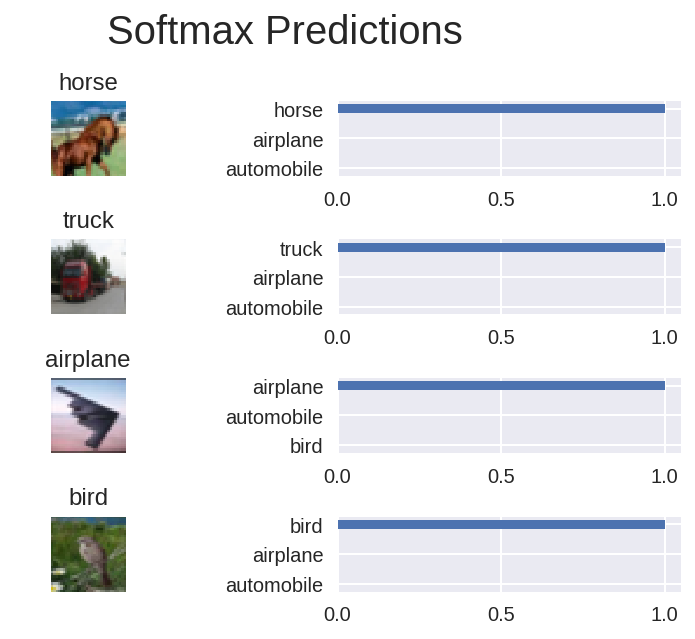

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. That's because there are many more techniques that can be applied to your model and we recemmond that once you are done with this project, you explore!

## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.